<a href="https://colab.research.google.com/github/Manasa130306/CODSOFT/blob/main/Customerchurnprediction_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
zip_path = r"C:\Users\killi\Downloads\archive(3).zip"


In [ ]:
zip_path = "C:\\Users\\killi\\Downloads\\archive(3).zip"


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [ ]:
import os
print(os.getcwd())  # Shows where Python is currently looking for files
print(os.listdir())  # Lists all files in the current directory


/content
['.config', 'archive (3).zip', 'archive (1).zip', 'dataset_folder', 'sample_data']


In [ ]:
zip_path = "archive (3).zip"  # note the space!
extract_path = "customer_churn_dataset"


In [ ]:
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print("Files extracted:", os.listdir(extract_path))


Files extracted: ['Churn_Modelling.csv']


In [ ]:
import pandas as pd
import os

file_path = os.path.join("customer_churn_dataset", "Churn_Modelling.csv")
data = pd.read_csv(file_path)

# Quick look at the data
print(data.head())
print(data.info())
print(data.describe())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# One-hot encode Geography
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8665
ROC-AUC: 0.7141283918480059
Confusion Matrix:
 [[1551   56]
 [ 211  182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



=== Random Forest Model Evaluation ===
Accuracy: 0.8325
ROC-AUC: 0.7949
Confusion Matrix:
 [[1377  230]
 [ 105  288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1607
           1       0.56      0.73      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.86      0.83      0.84      2000



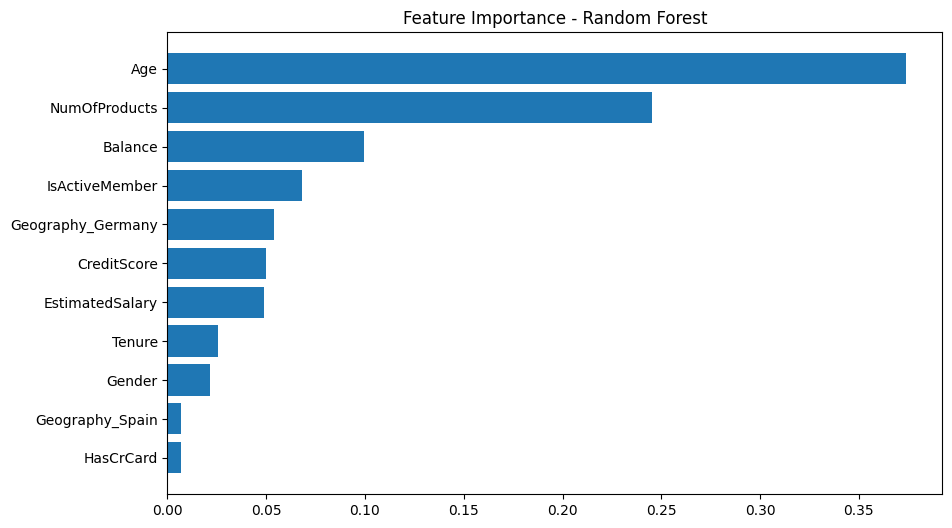

In [ ]:
# CUSTOMER CHURN PREDICTION - RANDOM FOREST
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
file_path = os.path.join("customer_churn_dataset", "Churn_Modelling.csv")
data = pd.read_csv(file_path)
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=== Random Forest Model Evaluation ===")
print("Accuracy:", round(accuracy,4))
print("ROC-AUC:", round(roc_auc,4))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Feature Importance - Random Forest")
plt.show()
